In [1]:
from pathlib import Path
import json

import pandas as pd

In [2]:
post_analysis_path = Path("../data/interim/issue-report-classification/post-analysis/nlbse24/gemini-2.5-flash.csv")
original_path = Path("../data/raw/issue-report-classification/nlbse24/issues_train.csv")

# Difficulty Distributions

In [3]:
df = pd.read_csv(post_analysis_path)
df

issue n.                                      json_analysis
0            0  {"diff_level": "easy", "diff_indicators": [{"n...
1            1  {"diff_level": "easy", "diff_indicators": [{"n...
2            2  {"diff_level": "medium", "diff_indicators": [{...
3            3  {"diff_level": "easy", "diff_indicators": [{"n...
4            4  {"diff_level": "easy", "diff_indicators": [{"n...
...        ...                                                ...
1495      1495  {"diff_level": "medium", "diff_indicators": [{...
1496      1496  {"diff_level": "easy", "diff_indicators": [{"n...
1497      1497  {"diff_level": "medium", "diff_indicators": [{...
1498      1498  {"diff_level": "easy", "diff_indicators": [{"n...
1499      1499  {"diff_level": "hard", "diff_indicators": [{"n...

[1500 rows x 2 columns]

In [4]:
# retrieve the difficulty level and place it in new column
df['difficulty_level'] = df['json_analysis'].apply(
    lambda x: json.loads(x)['diff_level']
)
df['difficulty_level'].value_counts()

difficulty_level
easy      995
medium    275
hard      230
Name: count, dtype: int64

In [5]:
original_df = pd.read_csv(original_path)
original_df['issue n.'] = original_df.index
df = pd.merge(
    df, original_df, 
    on='issue n.', 
    how='left'
)
df

issue n.                                      json_analysis  \
0            0  {"diff_level": "easy", "diff_indicators": [{"n...   
1            1  {"diff_level": "easy", "diff_indicators": [{"n...   
2            2  {"diff_level": "medium", "diff_indicators": [{...   
3            3  {"diff_level": "easy", "diff_indicators": [{"n...   
4            4  {"diff_level": "easy", "diff_indicators": [{"n...   
...        ...                                                ...   
1495      1495  {"diff_level": "medium", "diff_indicators": [{...   
1496      1496  {"diff_level": "easy", "diff_indicators": [{"n...   
1497      1497  {"diff_level": "medium", "diff_indicators": [{...   
1498      1498  {"diff_level": "easy", "diff_indicators": [{"n...   
1499      1499  {"diff_level": "hard", "diff_indicators": [{"n...   

     difficulty_level            repo           created_at    label  \
0                easy  facebook/react  2023-08-26 06:33:37      bug   
1                easy  facebook/react  2023-07-28 05:16:12      bug   
2              medium  facebook/react  2023-07-13 21:58:31      bug   
3                easy  facebook/react  2023-06-14 02:31:20      bug   
4                easy  facebook/react  2023-06-03 11:29:44      bug   
...               ...             ...                  ...      ...   
1495           medium   opencv/opencv  2022-01-24 10:48:13  feature   
1496             easy   opencv/opencv  2022-01-20 12:40:55  feature   
1497           medium   opencv/opencv  2022-01-15 02:39:22  feature   
1498             easy   opencv/opencv  2022-01-14 15:37:53  feature   
1499             hard   opencv/opencv  2022-01-11 16:30:53  feature   

                                                  title  \
0     [DevTools Bug] Cannot add node "1" because a n...   
1     [DevTools Bug]: Devtools extension build faili...   
2     [DevTools Bug]: Deprecated __REACT_DEVTOOLS_GL...   
3     [DevTools Bug] Cannot remove node "0" because ...   
4     [DevTools Bug] Cannot remove node "103" becaus...   
...                                                 ...   
1495                         core: FP denormals support   
1496  feature: submodule or a class scope for export...   
1497                             Reading BigTiff images   
1498                     Add general broadcasting layer   
1499  Adapt remote inference to operate with NV12 blobs   

                                                   body  
0     ### Website or app\n\nPrivate repo cannot give...  
1     ### Website or app\n\nN/A\n\n### Repro steps\n...  
2     ### Website or app\n\nhttps://github.com/open-...  
3     ### Website or app\n\nlocal\n\n### Repro steps...  
4     ### Website or app\n\nlocalhost\n\n### Repro s...  
...                                                 ...  
1495  relates #21046\r\n\r\n- support x86 SSE FTZ+DA...  
1496  All classes are registered in the scope that c...  
1497  **Merge with extra: https://github.com/opencv/...  
1498  Performance details(broadcasting 1x1 to 16x204...  
1499  ### Pull Request Readiness Checklist\r\n\r\nSe...  

[1500 rows x 8 columns]

In [6]:
if 'repo' in df.columns:
    difficulty_distribution = df.groupby(['repo', 'difficulty_level']).size().unstack(fill_value=0)

    # Normalize to get percentages
    difficulty_distribution_pct = difficulty_distribution.div(difficulty_distribution.sum(axis=1), axis=0) * 100

    print("Counts per repo-difficulty pair:")
    print(difficulty_distribution)
    print("\nPercentage distribution:")
    print(difficulty_distribution_pct)

Counts per repo-difficulty pair:
difficulty_level       easy  hard  medium
repo                                     
bitcoin/bitcoin         199    33      68
facebook/react          226    24      50
microsoft/vscode        162    80      58
opencv/opencv           188    57      55
tensorflow/tensorflow   220    36      44

Percentage distribution:
difficulty_level            easy       hard     medium
repo                                                  
bitcoin/bitcoin        66.333333  11.000000  22.666667
facebook/react         75.333333   8.000000  16.666667
microsoft/vscode       54.000000  26.666667  19.333333
opencv/opencv          62.666667  19.000000  18.333333
tensorflow/tensorflow  73.333333  12.000000  14.666667


In [7]:
# Difficulty distribution by label
difficulty_by_label = df.groupby(['label', 'difficulty_level']).size().unstack(fill_value=0)
difficulty_by_label_pct = difficulty_by_label.div(difficulty_by_label.sum(axis=1), axis=0) * 100

print("Counts per label-difficulty pair:")
print(difficulty_by_label)
print("\nPercentage distribution by label:")
print(difficulty_by_label_pct)

Counts per label-difficulty pair:
difficulty_level  easy  hard  medium
label                               
bug                452    12      36
feature            331    76      93
question           212   142     146

Percentage distribution by label:
difficulty_level  easy  hard  medium
label                               
bug               90.4   2.4     7.2
feature           66.2  15.2    18.6
question          42.4  28.4    29.2


In [8]:
if 'repo' in df.columns:
    # Difficulty distribution by repo and label combination
    difficulty_by_repo_label = df.groupby(['repo', 'label', 'difficulty_level']).size().unstack(fill_value=0)
    difficulty_by_repo_label_pct = difficulty_by_repo_label.div(difficulty_by_repo_label.sum(axis=1), axis=0) * 100

    print("Counts per repo-label-difficulty combination:")
    print(difficulty_by_repo_label)
    print("\nPercentage distribution by repo-label:")
    print(difficulty_by_repo_label_pct)

Counts per repo-label-difficulty combination:
difficulty_level                easy  hard  medium
repo                  label                       
bitcoin/bitcoin       bug         91     4       5
                      feature     71     8      21
                      question    37    21      42
facebook/react        bug         96     0       4
                      feature     60    16      24
                      question    70     8      22
microsoft/vscode      bug         80     4      16
                      feature     68    18      14
                      question    14    58      28
opencv/opencv         bug         87     2      11
                      feature     60    17      23
                      question    41    38      21
tensorflow/tensorflow bug         98     2       0
                      feature     72    17      11
                      question    50    17      33

Percentage distribution by repo-label:
difficulty_level                easy  hard  med

# Analysis Distribution

In [9]:
import ollama
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

## Key Indicators Distribution

In [10]:
# transform df['json_analysis'] into a df with diff_level and key_indicators columns
all_diff_indicators = {
    "diff_indicator": [],
    "diff_explanation": [],
    "diff_level": []
}
for analysis_json in df['json_analysis']:
    analysis = json.loads(analysis_json)
    diff_indicators = analysis.get('diff_indicators', [])
    for indicator in diff_indicators:
        all_diff_indicators["diff_indicator"].append(indicator['name'])
        all_diff_indicators["diff_explanation"].append(indicator['explanation'])
    all_diff_indicators["diff_level"].extend([analysis['diff_level']] * len(diff_indicators))

diff_indicators_df = pd.DataFrame(all_diff_indicators)
diff_indicators_df

diff_indicator  \
0                               Explicit Class Keywords   
1                   Structured Problem Reporting Format   
2               Technical Stack Trace and Error Details   
3                      Explicit Discriminative Keywords   
4                            Structural Bug Report Cues   
...                                                 ...   
4496                  Contextual Pull Request Structure   
4497  High-Density Domain-Specific Technical Vocabulary   
4498                      Indirect Target Label Mention   
4499     Dominance of Process and Configuration Lexicon   
4500  Structural Misalignment with Feature Descriptions   

                                       diff_explanation diff_level  
0     The presence of direct and unambiguous terms l...       easy  
1     The text adheres to a common issue reporting t...       easy  
2     The inclusion of specific programming error me...       easy  
3     The presence of direct and unambiguous terms l...       easy  
4     The text follows a predictable format commonly...       easy  
...                                                 ...        ...  
4496  The overall structure of the text, including t...       easy  
4497  The text is rich with specific technical terms...       easy  
4498  The word 'feature' is present only once and re...       hard  
4499  The text is saturated with terms like 'checkli...       hard  
4500  The text is structured as a checklist and a co...       hard  

[4501 rows x 3 columns]

In [11]:
diff_indicators = diff_indicators_df.apply(
    lambda row: f"# {row['diff_indicator']}:\n\n{row['diff_explanation']}", axis=1
)

In [12]:
# Ensure you have ollama running and the gemma model pulled: `ollama pull gemma`
response = ollama.embed(model='embeddinggemma', input=diff_indicators.tolist())
diff_indicators_df['embedding'] = response['embeddings']

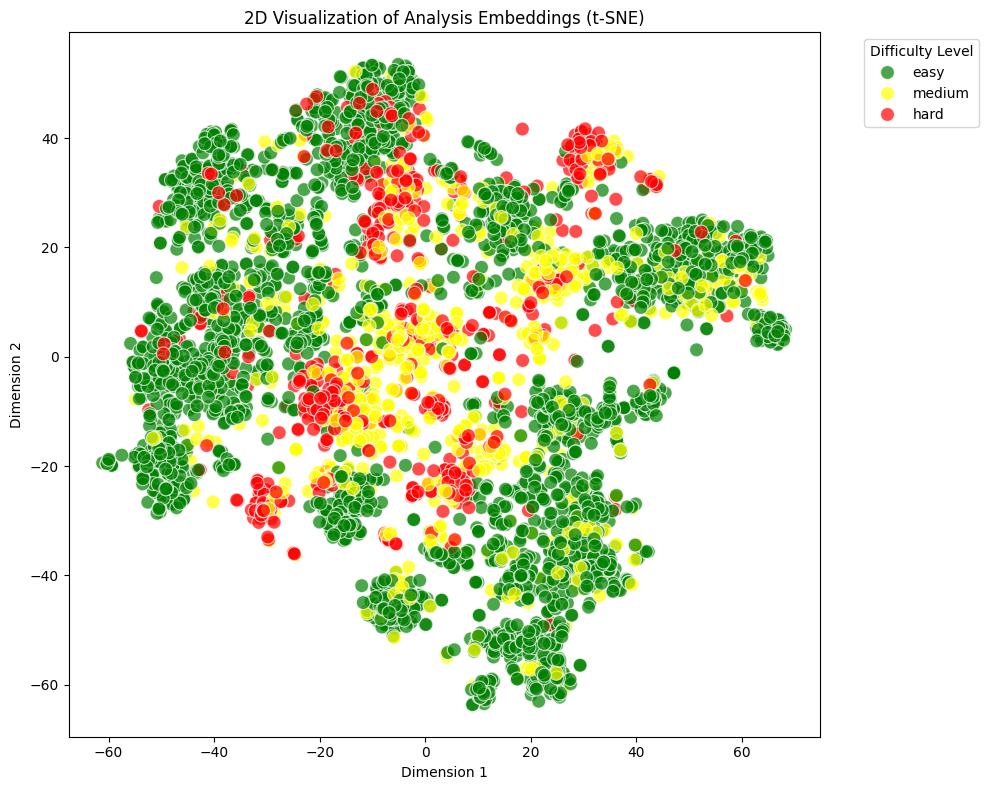

In [14]:
def plot(embeddings_matrix, df):
    # 2. Reduce dimensionality to 2D using t-SNE (non-linear)
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
    embeddings_2d = tsne.fit_transform(embeddings_matrix)

    # Add the 2D coordinates to the dataframe
    df['x_2d'] = embeddings_2d[:, 0]
    df['y_2d'] = embeddings_2d[:, 1]

    # 3. Plot the data distribution
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        data=df,
        x='x_2d',
        y='y_2d',
        hue='diff_level',
        palette={
            'easy': 'green',
            'medium': 'yellow',
            'hard': 'red'
        }, #'viridis',
        s=100,
        alpha=0.7
    )

    plt.title('2D Visualization of Analysis Embeddings (t-SNE)')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend(title='Difficulty Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot(np.array(diff_indicators_df['embedding'].tolist()), diff_indicators_df)

## Shift Operators Distribution

In [ ]:
all_shift_operators = {
    "shift": [],
    "name": [],
    "explanation": [],
}
for analysis_json in df['json_analysis']:
    analysis = json.loads(analysis_json)
    diff_shiftops = analysis.get('diff_shiftops', [])
    for shiftop, dict_value in diff_shiftops.items():
        all_shift_operators["shift"].append(shiftop)
        all_shift_operators["name"].append(dict_value['name'])
        all_shift_operators["explanation"].append(dict_value['explanation'])

shift_operators_df = pd.DataFrame(all_shift_operators)
shift_operators_df